# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adrian Alfajri
- **Email:** adrialfajri@gmail.com
- **ID Dicoding:** adrian_alfajri_sFCB

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Apa tren penyewaan sepeda pada berbagai waktu dalam sehari dan hari dalam seminggu?
- Bagaimana variasi penyewaan sepeda pada pagi, siang, dan malam hari di hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

print(day_data.head())
print(hour_data.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant     dteday  season  y

### Assessing Data

In [ ]:
print(day_data.info())
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
print(hour_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print(day_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("Data Duplicate: ", hour_data.duplicated().sum())
print("Data Duplicate: ", day_data.duplicated().sum())

Data Duplicate:  0
Data Duplicate:  0


In [ ]:
print(day_data.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [ ]:
print(hour_data.describe())

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

### Cleaning Data

* Menghapus kolom instant dan workingday karena tidak berhubungan langsung dengan analisis yang akan dilakukan. Kolom instant adalah indeks unik, sementara workingday bisa digantikan dengan weekday yang memberikan informasi yang lebih jelas.

* Mengubah tipe data season, yr, mnth, holiday, weekday, dan weathersit menjadi category untuk menghemat memori dan mempermudah analisis.

* Kolom dteday sudah diubah ke tipe datetime, yang akan mempermudah dalam analisis waktu dan tanggal.

* Kolom seperti yr, mnth, weathersit, dan cnt diganti namanya agar lebih mudah dibaca.

* Kolom category_days akan menunjukkan apakah hari tersebut termasuk Weekend atau Weekday untuk memudahkan analisis lebih lanjut.

* Meskipun tidak ditemukan nilai yang hilang maupun duplikasi, langkah ini tetap dilakukan untuk memastikan konsistensi data.

In [ ]:
# Menghapus kolom yang tidak diperlukan
day_data.drop(['instant', 'workingday'], axis=1, inplace=True)
hour_data.drop(['instant', 'workingday'], axis=1, inplace=True)

In [ ]:
# Mengubah tipe data kolom menjadi category
categorical_columns_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
categorical_columns_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']
day_data[categorical_columns_day] = day_data[categorical_columns_day].astype('category')
hour_data[categorical_columns_hour] = hour_data[categorical_columns_hour].astype('category')

In [ ]:
# Mengubah nama kolom untuk lebih deskriptif
day_data.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}, inplace=True)

In [ ]:
hour_data.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'cnt': 'total_rentals'
}, inplace=True)

In [ ]:
# Mengubah isi kolom menjadi lebih mudah dipahami
day_data['season'] = day_data['season'].cat.rename_categories({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
day_data['weekday'] = day_data['weekday'].cat.rename_categories({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
day_data['weather_situation'] = day_data['weather_situation'].cat.rename_categories({
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
})

In [ ]:
# Membuat kolom baru 'category_days' untuk mengetahui weekend atau weekday
day_data['category_days'] = day_data['weekday'].apply(lambda x: 'Weekend' if x in ['Sunday', 'Saturday'] else 'Weekday')

In [ ]:
# Menghilangkan duplikasi jika ada
day_data.drop_duplicates(inplace=True)
hour_data.drop_duplicates(inplace=True)

In [ ]:
# Mengisi nilai yang hilang jika ada
day_data.ffill(inplace=True)
hour_data.ffill(inplace=True)

In [ ]:
# Menampilkan data setelah proses cleaning
print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    731 non-null    datetime64[ns]
 1   season                  731 non-null    category      
 2   year                    731 non-null    category      
 3   month                   731 non-null    category      
 4   holiday                 731 non-null    category      
 5   weekday                 731 non-null    category      
 6   weather_situation       731 non-null    category      
 7   temperature             731 non-null    float64       
 8   feels_like_temperature  731 non-null    float64       
 9   humidity                731 non-null    float64       
 10  windspeed               731 non-null    float64       
 11  casual                  731 non-null    int64         
 12  registered              731 non-null    int64     

In [ ]:
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17379 non-null  datetime64[ns]
 1   season                  17379 non-null  category      
 2   year                    17379 non-null  category      
 3   month                   17379 non-null  category      
 4   hour                    17379 non-null  category      
 5   holiday                 17379 non-null  category      
 6   weekday                 17379 non-null  category      
 7   weather_situation       17379 non-null  category      
 8   temperature             17379 non-null  float64       
 9   feels_like_temperature  17379 non-null  float64       
 10  humidity                17379 non-null  float64       
 11  windspeed               17379 non-null  float64       
 12  casual                  17379 non-null  int64 

In [ ]:
day_data.head()

,date,season,year,month,holiday,weekday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_rentals,category_days
0,2011-01-01,Spring,0,1,0,Saturday,Mist or Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
1,2011-01-02,Spring,0,1,0,Sunday,Mist or Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Weekend
2,2011-01-03,Spring,0,1,0,Monday,Clear or Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Weekday
3,2011-01-04,Spring,0,1,0,Tuesday,Clear or Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Weekday
4,2011-01-05,Spring,0,1,0,Wednesday,Clear or Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Weekday


In [ ]:
hour_data.head()

,date,season,year,month,hour,holiday,weekday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
from google.colab import files

day_data.to_csv('day_clean.csv', index=False)
hour_data.to_csv('hour_clean.csv', index=False)

files.download('day_clean.csv')
files.download('hour_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Explore ...

#### 1. Deskripsi Statistik Dasar

In [ ]:
print("Deskripsi Statistik untuk day_data:")
day_data.describe(include="all")

Deskripsi Statistik untuk day_data:


,date,season,year,month,holiday,weekday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_rentals,category_days
count,731,731,731.0,731.0,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2.0,12.0,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Fall,1.0,1.0,0.0,Sunday,Clear or Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,188,366.0,62.0,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


Dalam dataset harian ini, rata-rata penyewaan sepeda mencapai 4504 sepeda per hari! Pengguna terdaftar (registered users) lebih mendominasi penyewaan dibandingkan pengguna kasual. Hal ini menunjukkan sepeda lebih sering digunakan untuk keperluan transportasi sehari-hari.


In [ ]:
print("\nDeskripsi Statistik untuk hour_data:")
hour_data.describe(include="all")


Deskripsi Statistik untuk hour_data:


,date,season,year,month,hour,holiday,weekday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_rentals
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dalam data per jam, rata-rata penyewaan sepeda adalah 189 sepeda per jam. Menariknya, penyewaan tertinggi per jam terjadi pada sore hari, tepat ketika orang-orang pulang kerja atau sekolah!


#### 2. Melihat distribusi dan rata-rata penyewaan sepeda berdasarkan kategori

In [ ]:
# Rata-rata penyewaan sepeda berdasarkan musim (season)
season_group = day_data.groupby('season')['total_rentals'].mean()
print("\nRata-rata Penyewaan Sepeda Berdasarkan Musim (Season):")
print(season_group)


Rata-rata Penyewaan Sepeda Berdasarkan Musim (Season):
season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: total_rentals, dtype: float64


<ipython-input-24-b2c85f26c1e2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_group = day_data.groupby('season')['total_rentals'].mean()


Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi, mencapai rata-rata 5644 sepeda per hari! Sepertinya, musim gugur dengan cuaca yang lebih sejuk benar-benar menjadi favorit pengguna sepeda.



In [ ]:
# Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu (weekday)
weekday_group = day_data.groupby('weekday')['total_rentals'].mean()
print("\nRata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu (Weekday):")
print(weekday_group)


Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu (Weekday):
weekday
Sunday       4228.828571
Monday       4338.123810
Tuesday      4510.663462
Wednesday    4548.538462
Thursday     4667.259615
Friday       4690.288462
Saturday     4550.542857
Name: total_rentals, dtype: float64


<ipython-input-25-f5cfcb437034>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_group = day_data.groupby('weekday')['total_rentals'].mean()


Jumat (Friday) menjadi hari dengan penyewaan tertinggi, rata-rata 4690 sepeda! Apakah ini menunjukkan bahwa banyak orang ingin mengurangi stres setelah seminggu bekerja dengan bersepeda?

#### 3. Visualisasi perbandingan jumlah penyewaan berdasarkan musim dan hari


<ipython-input-26-a95c83ffbca8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_rentals', data=day_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

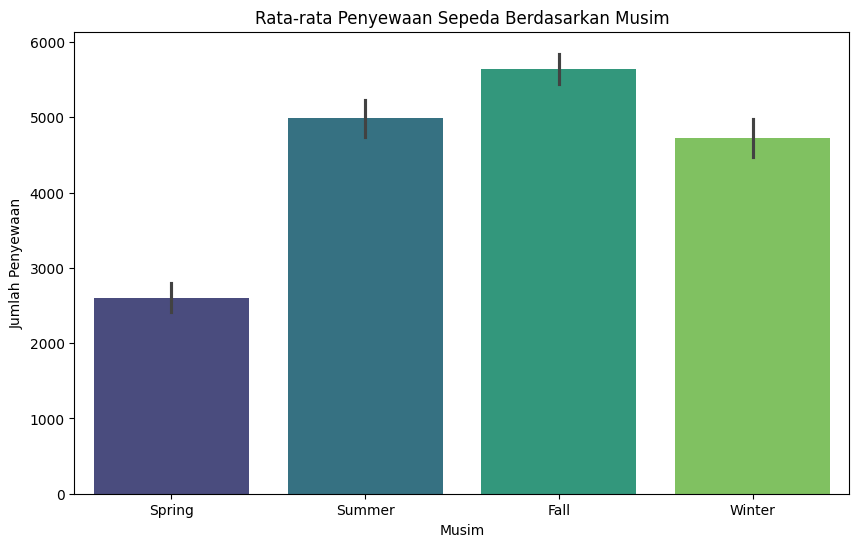

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_rentals', data=day_data, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Penyewaan sepeda mencapai puncaknya di bulan Juni dan Juli dengan lebih dari 5500 sepeda disewa per hari! Ini membuktikan bahwa bulan-bulan musim panas adalah waktu yang paling populer untuk bersepeda, mungkin karena kondisi cuaca yang sangat mendukung aktivitas outdoor.

<ipython-input-27-16ac858c196e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='total_rentals', data=day_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

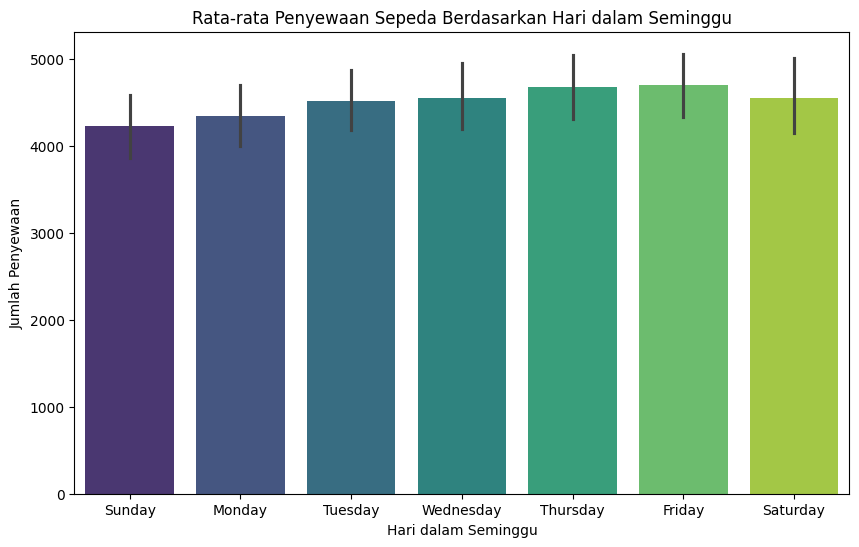

In [ ]:
# Visualisasi perbandingan jumlah penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_rentals', data=day_data, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Jam sibuk penyewaan sepeda terlihat jelas pada pagi hari (pukul 8-9) dan sore hari (pukul 17-18) di hari kerja. Ini menunjukkan bahwa sepeda digunakan sebagai moda transportasi utama saat orang-orang berangkat dan pulang kerja!

#### 4. Visualisasi tren penyewaan sepeda per bulan


<ipython-input-28-a2d0bffec7e7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='total_rentals', data=day_data, marker='o', ci=None)


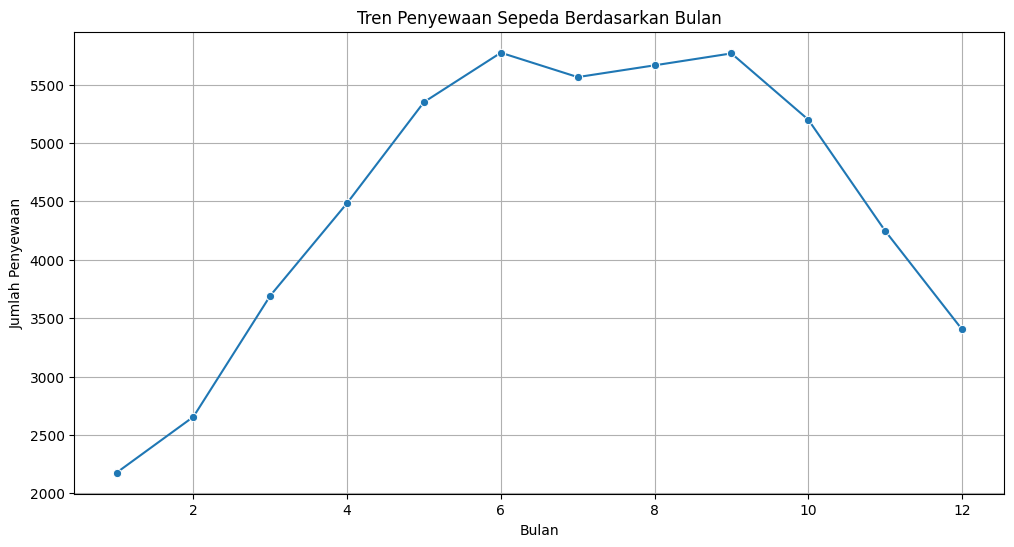

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_rentals', data=day_data, marker='o', ci=None)
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

Jumlah penyewaan sepeda mengalami peningkatan signifikan dari bulan Februari hingga mencapai puncaknya pada bulan Juni-Juli, sebelum menurun tajam pada akhir tahun di bulan Desember, menunjukkan tren penggunaan sepeda yang lebih tinggi pada bulan-bulan musim panas.

#### 5. Visualisasi distribusi penyewaan sepeda berdasarkan waktu dalam sehari (hour)

<ipython-input-29-bcab7585a64b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='total_rentals', hue='weekday', data=hour_data, ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

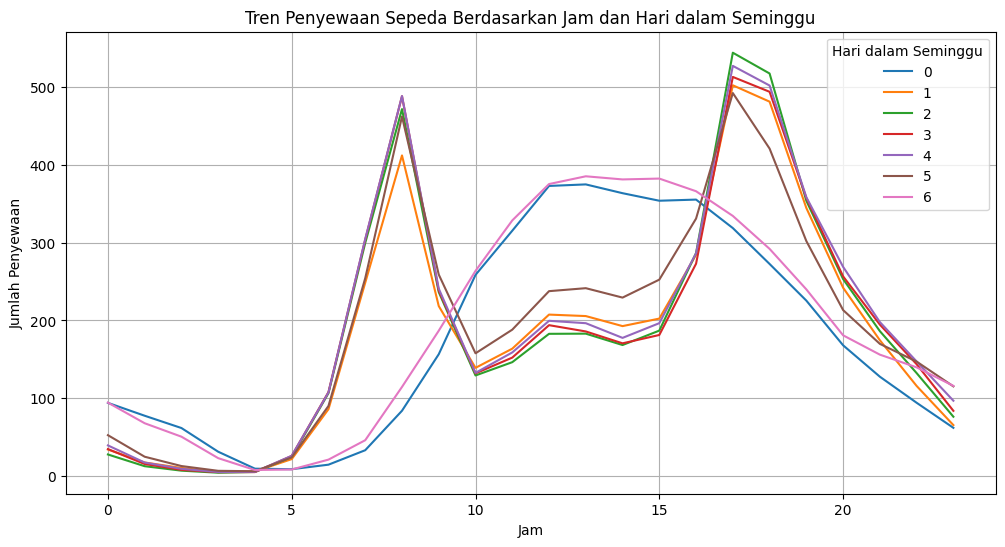

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='total_rentals', hue='weekday', data=hour_data, ci=None)
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari dalam Seminggu')
plt.grid(True)
plt.show()

Penyewaan sepeda mencapai puncaknya pada jam-jam sibuk di pagi hari sekitar pukul 8-9 dan sore hari sekitar pukul 17-18 pada hari kerja, mencerminkan penggunaan sepeda sebagai sarana transportasi untuk berangkat dan pulang kerja atau sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

In [ ]:
day_data.columns.tolist()

['date',
 'season',
 'year',
 'month',
 'holiday',
 'weekday',
 'weather_situation',
 'temperature',
 'feels_like_temperature',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_rentals',
 'category_days']

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
weather_group = day_data.groupby('weather_situation')['total_rentals'].mean().reset_index()

<ipython-input-31-91458df3e9b6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_group = day_data.groupby('weather_situation')['total_rentals'].mean().reset_index()


<ipython-input-32-16fb17465839>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_situation', y='total_rentals', data=weather_group, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

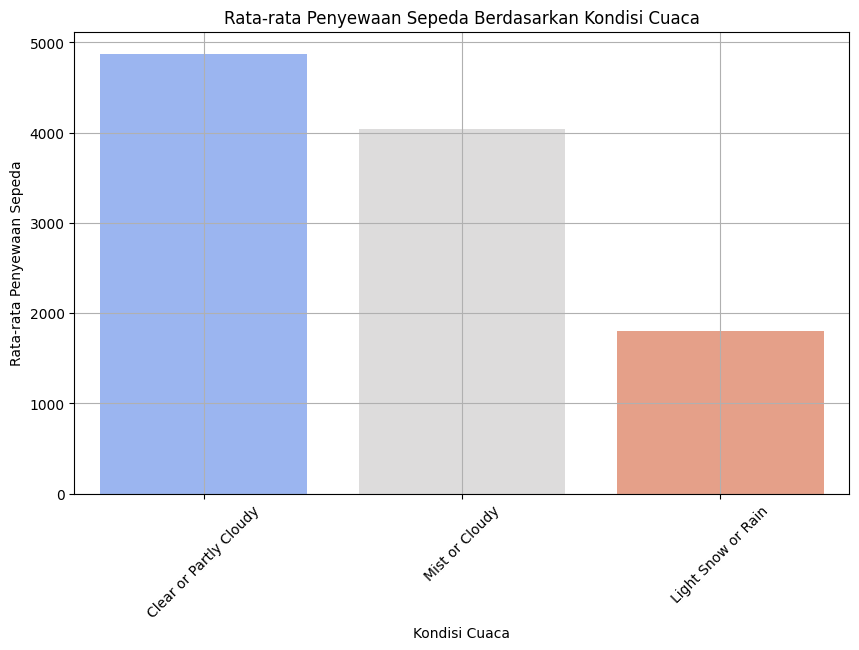

In [ ]:
# Visualisasi rata-rata penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_situation', y='total_rentals', data=weather_group, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

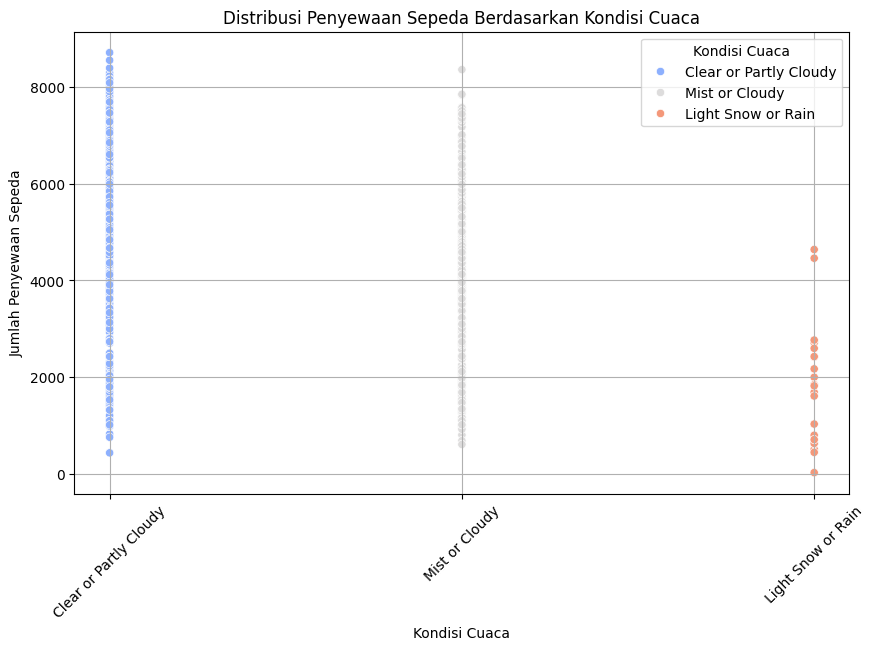

In [ ]:
# Visualisasi distribusi penyewaan sepeda berdasarkan kondisi cuaca di scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weather_situation', y='total_rentals', data=day_data, hue='weather_situation', palette='coolwarm')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

Pengaruh Cuaca terhadap Penyewaan Sepeda:
* Rata-rata penyewaan sepeda tertinggi terjadi pada kondisi cuaca 1 yang mewakili Clear or Partly Cloudy (Cerah atau Berawan Sebagian) dengan lebih dari 5000 penyewaan sepeda.
* Jumlah penyewaan sepeda menurun ketika kondisi cuaca menjadi 2 (Mist or Cloudy) dan lebih drastis menurun pada kondisi 3 (Light Snow or Rain).
* Dari visualisasi distribusi, terlihat bahwa pengguna cenderung menghindari bersepeda saat cuaca buruk seperti hujan ringan atau salju.

### Pertanyaan 2: Apa tren penyewaan sepeda pada berbagai waktu dalam sehari dan hari dalam seminggu?

<ipython-input-34-bb28c1f643cf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trend = hour_data.groupby('hour')['total_rentals'].mean().reset_index()


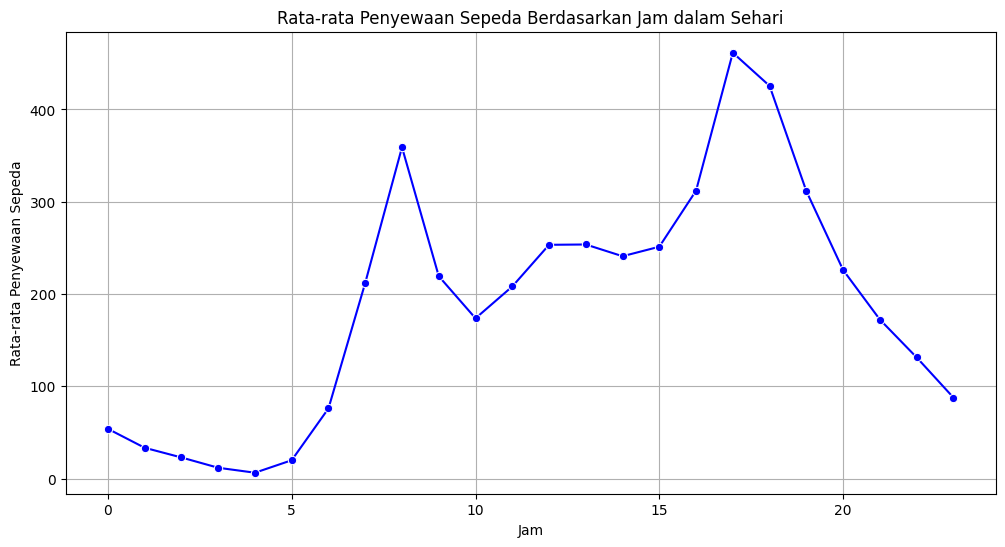

In [ ]:
# Rata-rata penyewaan sepeda berdasarkan jam dalam sehari
hourly_trend = hour_data.groupby('hour')['total_rentals'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='total_rentals', data=hourly_trend, marker='o', color='b')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid(True)
plt.show()

Jumlah penyewaan sepeda menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 8-9 dan sore hari sekitar pukul 17-18. Ini menunjukkan bahwa sepeda digunakan secara signifikan selama jam berangkat dan pulang kerja atau sekolah.

<ipython-input-35-b305f38bf537>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_trend = hour_data.groupby('weekday')['total_rentals'].mean().reset_index()
<ipython-input-35-b305f38bf537>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='total_rentals', data=weekday_trend, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-pack

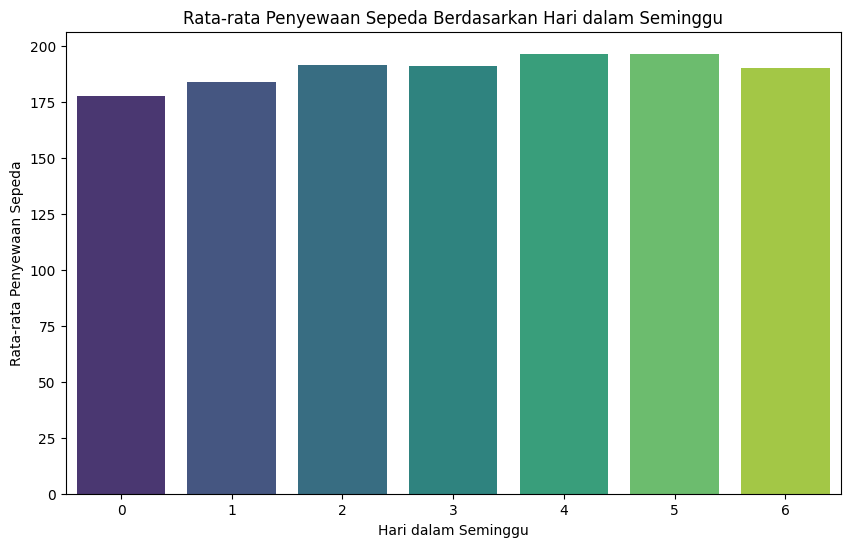

In [ ]:
# Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu
weekday_trend = hour_data.groupby('weekday')['total_rentals'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_rentals', data=weekday_trend, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

Penyewaan sepeda memiliki distribusi yang relatif konsisten sepanjang minggu, dengan sedikit peningkatan pada hari kerja dibandingkan dengan akhir pekan.

<ipython-input-36-4b0736606dc3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_weekday_trend = hour_data.groupby(['weekday', 'hour'])['total_rentals'].mean().reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/py

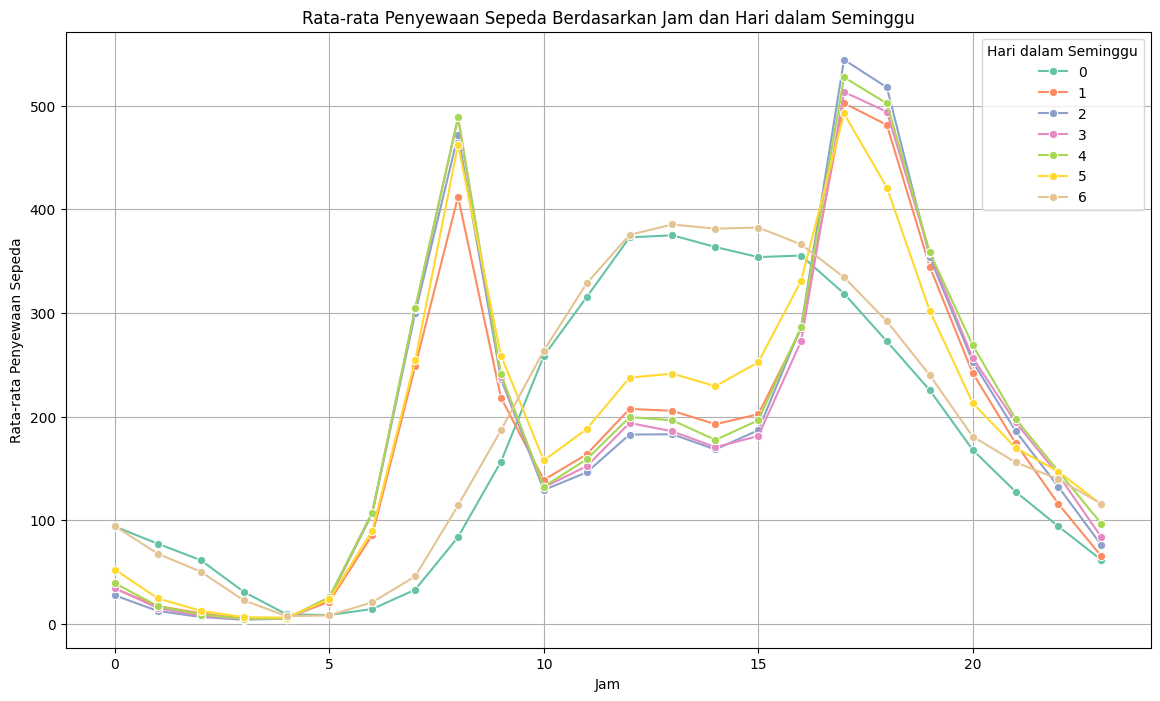

In [ ]:
# Membandingkan rata-rata penyewaan sepeda berdasarkan jam dan hari dalam seminggu
hour_weekday_trend = hour_data.groupby(['weekday', 'hour'])['total_rentals'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='total_rentals', hue='weekday', data=hour_weekday_trend, palette='Set2', marker='o')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Hari dalam Seminggu', loc='upper right')
plt.grid(True)
plt.show()

- Pada hari kerja (Senin-Jumat), terlihat puncak penyewaan yang tajam pada pagi dan sore hari, yang menunjukkan penggunaan sepeda untuk keperluan transportasi sehari-hari.
- Pada akhir pekan (Sabtu-Minggu), penyewaan lebih merata sepanjang hari, menunjukkan penggunaan sepeda lebih untuk rekreasi atau aktivitas santai.

### Pertanyaan 3: Bagaimana variasi penyewaan sepeda pada pagi, siang, dan malam hari di hari kerja dibandingkan dengan akhir pekan?

In [ ]:
# Menambah kolom baru 'time_of_day' untuk kategori waktu
def categorize_time(hour):
    if 6 <= hour < 11:
        return 'Pagi'
    elif 11 <= hour < 17:
        return 'Siang'
    elif 17 <= hour <= 23:
        return 'Malam'
    else:
        return 'Dini Hari'

In [ ]:
# Mengaplikasikan fungsi untuk membuat kategori waktu
hour_data['time_of_day'] = hour_data['hour'].apply(categorize_time)

In [ ]:
# Membuat kategori hari menjadi 'Weekday' dan 'Weekend'
hour_data['day_type'] = hour_data['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

In [ ]:
# Melihat rata-rata penyewaan sepeda berdasarkan time_of_day dan day_type
time_of_day_trend = hour_data.groupby(['day_type', 'time_of_day'])['total_rentals'].mean().reset_index()

In [ ]:
hour_data.columns.tolist()

['date',
 'season',
 'year',
 'month',
 'hour',
 'holiday',
 'weekday',
 'weather_situation',
 'temperature',
 'feels_like_temperature',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_rentals',
 'time_of_day',
 'day_type']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


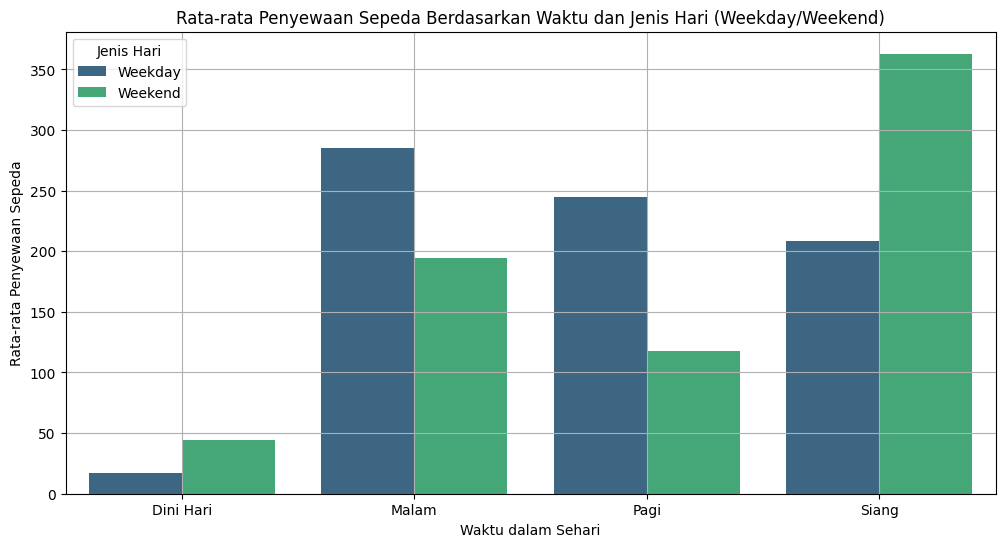

In [ ]:
# Visualisasi menggunakan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='time_of_day', y='total_rentals', hue='day_type', data=time_of_day_trend, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Waktu dan Jenis Hari (Weekday/Weekend)')
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Jenis Hari')
plt.grid(True)
plt.show()

- Pada hari kerja (Weekdays), penyewaan sepeda lebih tinggi pada waktu pagi dan malam, yang menunjukkan penggunaan sepeda sebagai sarana transportasi untuk pergi dan pulang kerja atau sekolah.
- Pada akhir pekan (Weekend), penyewaan sepeda lebih tinggi pada siang hari, mengindikasikan penggunaan sepeda untuk aktivitas rekreasi atau santai.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

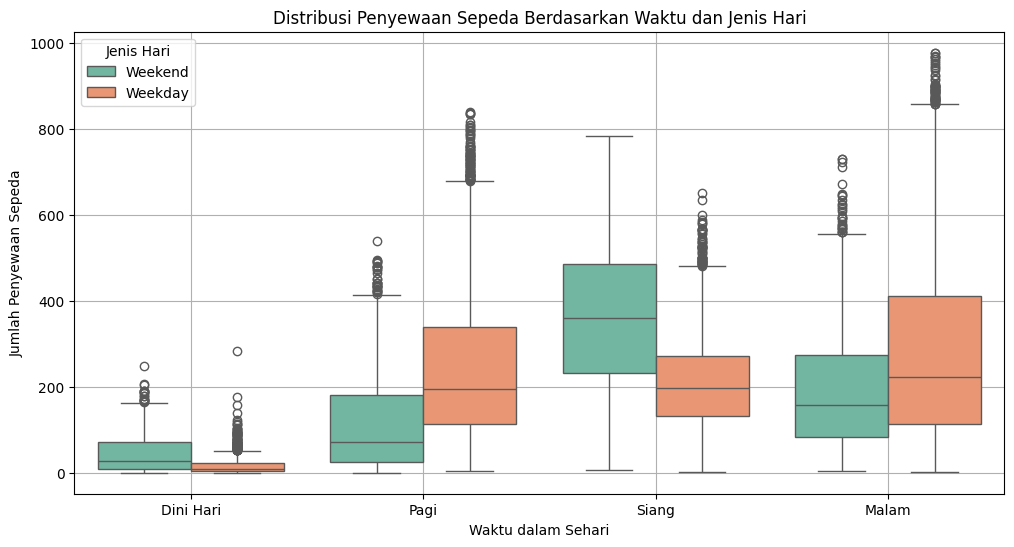

In [ ]:
# Visualisasi distribusi penyewaan sepeda untuk waktu dan jenis hari
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_of_day', y='total_rentals', hue='day_type', data=hour_data, palette='Set2')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Waktu dan Jenis Hari')
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Jenis Hari')
plt.grid(True)
plt.show()

- Pada pagi hari selama hari kerja, penyewaan cenderung lebih tinggi dan bervariasi, sementara pada siang hari akhir pekan, distribusi penyewaan menunjukkan lebih banyak outlier, yang berarti ada lonjakan penyewaan pada waktu-waktu tertentu.
- Malam hari pada hari kerja juga memiliki variasi penyewaan yang tinggi, kemungkinan karena orang-orang lebih cenderung bersepeda untuk pulang atau melakukan aktivitas setelah bekerja.

## Conclusion

##### Bagaimana Pengaruh Cuaca terhadap Penyewaan Sepeda?

- Conclusion pertanyaan 1 : Jumlah penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca. Ketika cuaca cerah atau berawan sebagian (Clear or Partly Cloudy), penyewaan sepeda mencapai puncaknya dengan rata-rata penyewaan lebih dari 5000 sepeda. Jumlah penyewaan cenderung menurun pada kondisi cuaca yang lebih buruk, seperti kabut, hujan ringan, atau salju. Ini menunjukkan bahwa pengguna cenderung menghindari penggunaan sepeda pada cuaca yang kurang ideal, dan lebih memilih bersepeda ketika cuaca mendukung aktivitas outdoor.


##### Apa Tren Penyewaan Sepeda pada Berbagai Waktu dalam Sehari dan Hari dalam Seminggu?

- Conclusion pertanyaan 2 : Penyewaan sepeda menunjukkan dua puncak utama pada hari kerja, yaitu pagi hari (sekitar pukul 8-9) dan sore hari (sekitar pukul 17-18), yang mencerminkan penggunaan sepeda untuk keperluan transportasi saat berangkat dan pulang kerja atau sekolah. Pada akhir pekan, tren penyewaan lebih merata sepanjang hari, dengan sedikit peningkatan pada siang hari (sekitar pukul 13-14), menunjukkan bahwa pengguna lebih cenderung bersepeda untuk rekreasi dan aktivitas santai pada akhir pekan.

##### Bagaimana Variasi Penyewaan Sepeda pada Pagi, Siang, dan Malam Hari di Hari Kerja Dibandingkan dengan Akhir Pekan?

- Conclusion pertanyaan 3 : Pada hari kerja, penyewaan sepeda tertinggi terjadi pada pagi dan malam hari, yang menunjukkan pengguna sepeda memanfaatkannya sebagai sarana transportasi utama untuk berangkat dan pulang kerja atau sekolah. Sementara itu, pada akhir pekan, penyewaan sepeda lebih tinggi pada siang hari, yang menunjukkan preferensi penggunaan sepeda untuk rekreasi dan kegiatan santai. Secara keseluruhan, pola penggunaan sepeda pada hari kerja lebih terfokus pada jam-jam tertentu, sementara pada akhir pekan penyewaan lebih tersebar merata sepanjang siang dan malam hari.

## Menerapkan Analisis Lanjutan

### Analisis Klustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Memilih fitur untuk clustering
clustering_features = hour_data[['hour', 'total_rentals', 'weather_situation']]

In [ ]:
# 2. Mengubah nilai `weather_situation` menjadi kategori numerik
clustering_features['weather_situation'] = clustering_features['weather_situation'].astype('category').cat.codes

<ipython-input-46-cb9204f3631c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features['weather_situation'] = clustering_features['weather_situation'].astype('category').cat.codes


In [ ]:
# 3. Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [ ]:
# 4. Menentukan jumlah klaster menggunakan metode Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

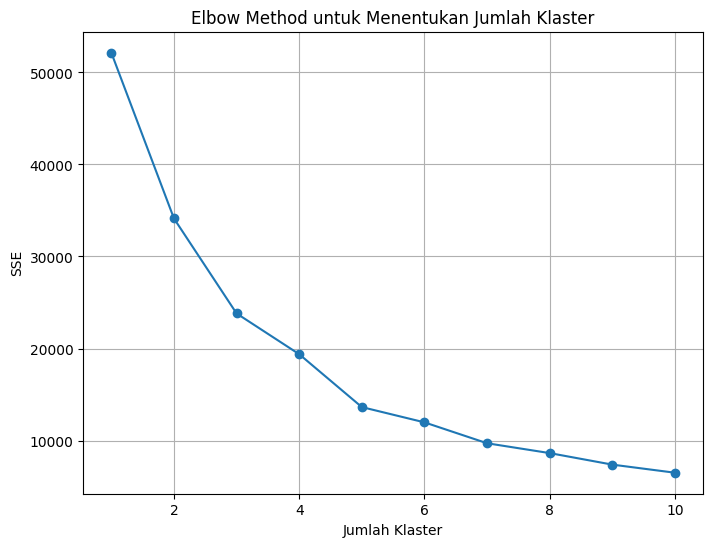

In [ ]:
# 5. Visualisasi metode Elbow untuk menentukan jumlah klaster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [ ]:
# 6. Menerapkan K-Means dengan jumlah klaster optimal (misalnya 4 klaster)
kmeans = KMeans(n_clusters=4, random_state=42)
hour_data['cluster'] = kmeans.fit_predict(scaled_features)

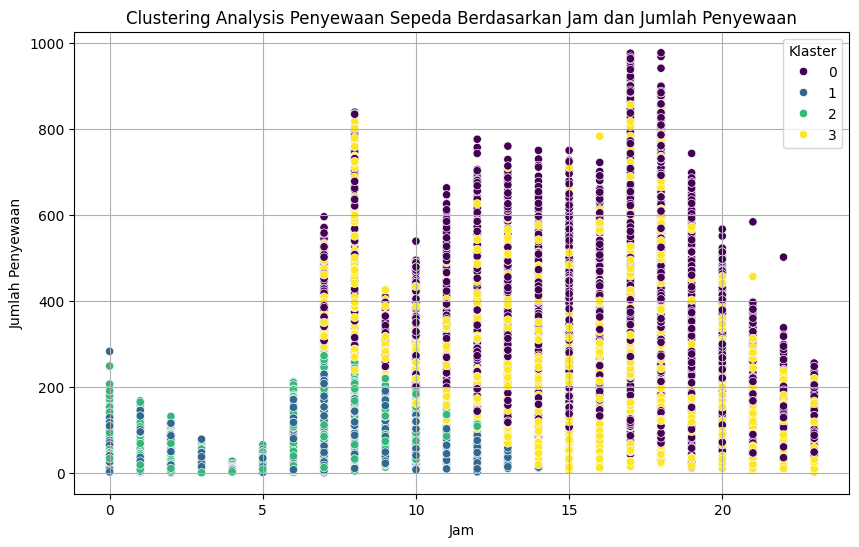

In [ ]:
# 7. Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='total_rentals', hue='cluster', data=hour_data, palette='viridis')
plt.title('Clustering Analysis Penyewaan Sepeda Berdasarkan Jam dan Jumlah Penyewaan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Klaster')
plt.grid(True)
plt.show()

Clustering analysis mengelompokkan penyewaan sepeda menjadi empat klaster berdasarkan jam dan jumlah penyewaan. Klaster menunjukkan pola yang berbeda: Klaster 0 mendominasi penyewaan pada malam dan dini hari dengan jumlah rendah, Klaster 1 berfokus pada penyewaan di siang hari, Klaster 2 mengelompokkan penyewaan tinggi di pagi hari (menandakan penggunaan untuk berangkat kerja atau sekolah), dan Klaster 3 memiliki puncak penyewaan tertinggi di sore hari (pengguna pulang kerja). Hasil ini mengindikasikan bahwa penyedia layanan perlu memfokuskan alokasi sepeda pada pagi dan sore hari untuk memenuhi permintaan tertinggi, serta meningkatkan promosi di jam-jam penggunaan rendah pada malam dan siang hari.

### Analisis RFM

In [ ]:
# Menyiapkan data RFM berdasarkan tanggal penyewaan
rfm_data = day_data.groupby('date').agg({
    'total_rentals': ['sum', 'count'],  # Sum sebagai Monetary dan Count sebagai Frequency
    'date': lambda x: (day_data['date'].max() - x.max()).days  # Menghitung Recency
}).reset_index()

In [ ]:
# Merapikan kolom
rfm_data.columns = ['date', 'Monetary', 'Frequency', 'Recency']

In [ ]:
print(rfm_data.head())

        date  Monetary  Frequency  Recency
0 2011-01-01       985          1      730
1 2011-01-02       801          1      729
2 2011-01-03      1349          1      728
3 2011-01-04      1562          1      727
4 2011-01-05      1600          1      726


Terlihat hasil RFM Analysis di mana setiap baris mewakili hari penyewaan sepeda (date) dengan nilai Monetary (total penyewaan pada hari tersebut), Frequency (jumlah hari penyewaan), Recency (jumlah hari sejak penyewaan terakhir), dan R_Score yang bernilai 1 (menandakan nilai Recency yang paling tinggi, yaitu penyewaan dilakukan paling lama sebelumnya).